In [1]:
from preprocess_email import ham_df,spam_df, combined_df
import nltk
import numpy as np
import seaborn as sns
import pandas as pd

(2460, 2)
                                           Main_Content  Label
0     From Date Wed 21 Aug 2002 023656 0400 Exmh7785...      0
1     From Robert Elz Date Wed 21 Aug 2002 150107 07...      0
2     OuchIll get right on it From Robert Elz Date W...      0
3     On Wed 21 Aug 2002 150107 0700 Robert Elz said...      0
4     From Chris Garrigues Date Wed 21 Aug 2002 1017...      0
...                                                 ...    ...
2455  Long time no chatHow have you been If youve be...      1
2456  Below is the result of your feedback form It w...      1
2457  When Americas top companies compete for your b...      1
2458  Want to watch HARDCORE PORN MOVIES Our site is...      1
2459  Dear cypherpunks 7000EMAIL150 7000Email7000 BE...      1

[2460 rows x 2 columns]


In [2]:
values = combined_df['Label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100 #ham
percentage_1 = (values[1]/ total) *100 #spam

print('percentage of ham :' ,percentage_0)
print('percentage of spam :' ,percentage_1)

# print(combined_df.shape)
# print(combined_df['Label'].value_counts())

percentage of ham : 56.869918699187
percentage of spam : 43.130081300813


In [3]:
# first_row = combined_df.iloc[:5]
# test_df = pd.DataFrame(first_row)

In [4]:
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))



nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()



import string

def process_text(content):
    filtered_list = []
    remove_punc = []
    content = content.lower()
    content = word_tokenize(content)
    for word in content:
        remove_punc = [word for word in content if word not in string.punctuation] # remove punctuation
    
    content = remove_punc
    
    # remove_punc.clear()
    
    for word in content:
        if word.casefold() not in stop_words:
            filtered_list.append(word)

    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]
    # stemmed_words = [stemmer.stem(word) for word in filtered_list]
    content.clear()
    remove_punc.clear()
    
    return ' '.join(lemmatized_words)
    # return ' '.join(stemmed_words)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
combined_df['processed_text'] = combined_df['Main_Content'].apply(process_text)
print(combined_df.shape)
combined_df.describe()

(2460, 3)


,Label
count,2460.000000
mean,0.431301
std,0.495359
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
# output_excel_path = r'c:\Users\vishw\OneDrive\Desktop\test2.csv'
# first_row.to_csv(output_excel_path, index=False)
combined_df.tail()

,Main_Content,Label,processed_text
2455,Long time no chatHow have you been If youve be...,1,long time chathow youve like youve tryingtryin...
2456,Below is the result of your feedback form It w...,1,result feedback form submitted thursday july 2...
2457,When Americas top companies compete for your b...,1,america top company compete business wintake m...
2458,Want to watch HARDCORE PORN MOVIES Our site is...,1,want watch hardcore porn movie site voted 1 br...
2459,Dear cypherpunks 7000EMAIL150 7000Email7000 BE...,1,dear cypherpunks 7000email150 7000email7000 em...


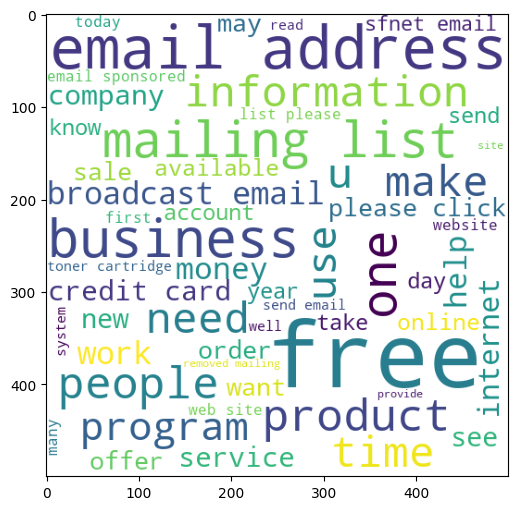

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(combined_df[combined_df['Label'] == 1]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

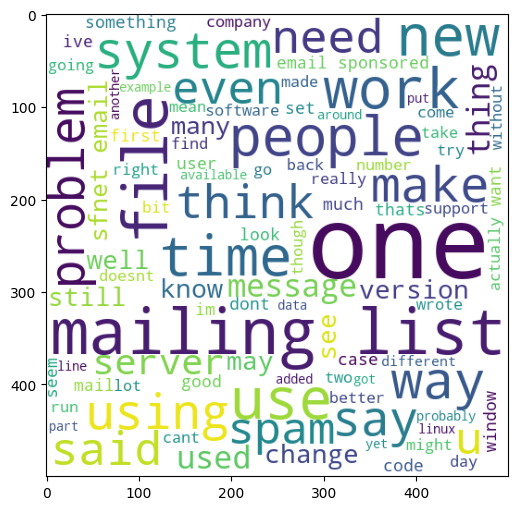

In [8]:
ham_wc = wc.generate(combined_df[combined_df['Label'] == 0]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [9]:
spam_carpos = []
for sentence in combined_df[combined_df['Label'] == 1]['processed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [10]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

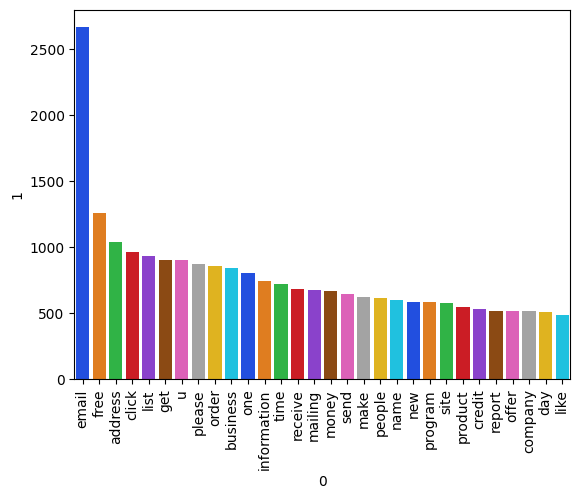

In [11]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [12]:
ham_carpos = []
for sentence in combined_df[combined_df['Label'] == 0]['processed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [13]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

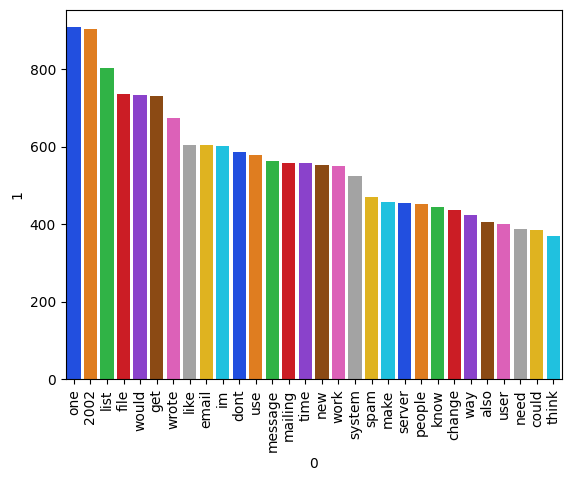

In [14]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [15]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [16]:
from sklearn.model_selection import train_test_split

X = combined_df['processed_text'].astype(str)
X_tfidf = tfidf.fit_transform(X)
labels = combined_df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=50)

In [17]:
# # Convert TF-IDF matrix to DataFrame
# tfidf_v = TfidfVectorizer()
# X_2 = tfidf_v.fit_transform(X)
# tfidf_df = pd.DataFrame(X_2.toarray(), columns=tfidf_v.get_feature_names_out(), index=range(1, len(X)+1))

# # Plot the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(tfidf_df, cmap='viridis', annot=True, fmt='.2f')
# plt.title('TF-IDF Heatmap')
# plt.xlabel('Terms')
# plt.ylabel('Text')
# plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create and fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred = logistic_model.predict(X_test)
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.975609756097561
Precision: 0.9906976744186047
